In [2]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [5]:
df = pd.read_csv('/home/sarthak/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})


In [9]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['message'] = df['message'].apply(clean_text)

In [10]:
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Model Accuracy: 0.97
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [11]:
sample_message = ["Congratulations! You won a free vacation. Click the link now!"]
sample_transformed = vectorizer.transform(sample_message)
prediction = model.predict(sample_transformed)
print("Spam" if prediction[0] else "Not Spam")

Spam


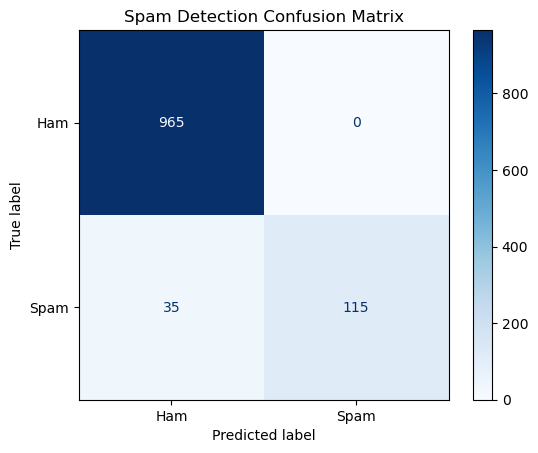

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues', values_format='d')

# Show the plot
plt.title('Spam Detection Confusion Matrix')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to 0 and 1
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Now compute metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')


Precision: 1.00
Recall: 0.77
F1 Score: 0.87
ROC-AUC Score: 0.88
